<a href="https://colab.research.google.com/github/npace828/BeastCancerWisc_Xentropy_LogReg/blob/main/Cancer_Xentropy_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

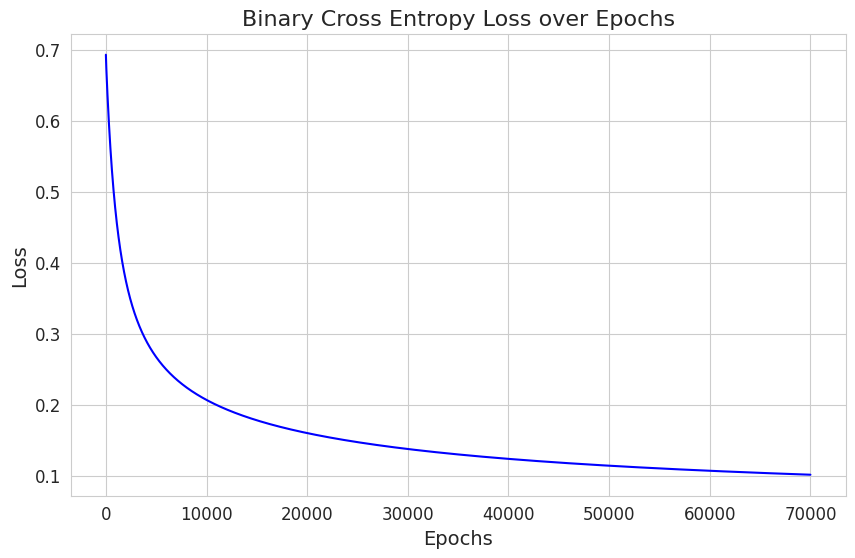

Minimal cost: 0.10115191111460398


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from google.colab import files
uploaded = files.upload()
# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Logistic Regression Class
class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.cost_list = []

        # Perform gradient descent
        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            # Compute and store cost
            cost = -(1 / n_samples) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.cost_list.append(cost)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred

# Load Breast Cancer Wisconsin dataset
df = pd.read_csv('bcw.csv')
X = df.drop(columns='diagnosis')
y = np.array([0 if i == "M" else 1 for i in df['diagnosis']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2024, stratify=y)

# Preprocessing
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
scaler = MinMaxScaler()
pipe = Pipeline([('transformer', power_transformer), ('scaler', scaler)])
preprocessor = ColumnTransformer([('pipe', pipe, X.columns)])
preprocessor.fit(X_train)
X_train_trans = pd.DataFrame(preprocessor.transform(X_train)).set_axis([i[6:] for i in preprocessor.get_feature_names_out()], axis=1)
X_test_trans = pd.DataFrame(preprocessor.transform(X_test)).set_axis([i[6:] for i in preprocessor.get_feature_names_out()], axis=1)

# Train logistic regression model
lr = LogisticRegression(lr=0.01, n_iters=70_000)
lr.fit(X_train_trans, y_train)
pred = lr.predict(X_test_trans)

# Visualize loss over epochs
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
plt.plot(range(len(lr.cost_list)), lr.cost_list, color='blue')
plt.title('Binary Cross Entropy Loss over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Print minimal cost
print('Minimal cost:', min(lr.cost_list))

